**In this notebook we compare different torch optimizers applied for solving transport task**

In [1]:
from model import Model
from data_reader.data_reader import *
from torch import optim
from matplotlib import pyplot as plt
from time import time

In [2]:
data_reader = DataReader()
data_reader.read_all("data/Anaheim_net.tntp", "data/Anaheim_trips.tntp", "data/Anaheim_flow.tntp")

In [7]:
num_iters=1000

**General solve function wrapper, measures work time**

In [8]:
def solve(model, optimizer, num_iters=num_iters, loss_history=True, verbose=True):    
    start_time = time()

    flows, primal_values = model.solve(optimizer, num_iters=num_iters, loss_history=loss_history, verbose=verbose)

    end_time = time()
    
    seconds_elapsed = end_time - start_time
    print("Time elapsed:", seconds_elapsed, "seconds")

    avg_step_time = seconds_elapsed / num_iters
    print("Average step time:", avg_step_time, "seconds")
    
    return flows, primal_values, seconds_elapsed

# Check if graph correspondences are satisfied
def check_graph(model, flows):
    return model.graph.check_graph(flows, model.graph_correspondences)

# SGD

In [14]:
# model saves progress
sgd_model = Model(data_reader)
sgd_optimizer = optim.SGD([sgd_model.t], lr=0.0000004, momentum=0.9)

In [15]:
sgd_flows, sgd_primal_vals, sgd_seconds = solve(sgd_model, sgd_optimizer, verbose=False)

Time elapsed: 106.16393899917603 seconds
Average step time: 0.10616393899917602 seconds


# RMSprop

In [16]:
rmsprop_model = Model(data_reader)
rmsprop_optimizer = optim.RMSprop([rmsprop_model.t], lr=0.005)

In [17]:
rmsprop_flows, rmsprop_primal_vals, rmsprop_seconds = solve(rmsprop_model, rmsprop_optimizer, verbose=False)

Time elapsed: 105.17204904556274 seconds
Average step time: 0.10517204904556274 seconds


# Adam

In [18]:
adam_model = Model(data_reader)
adam_optimizer = optim.Adam([adam_model.t], lr=0.01)

In [19]:
adam_flows, adam_primal_vals, adam_seconds = solve(adam_model, adam_optimizer)

i = 0 , primal_value= 1264517.8831331283
i = 10 , primal_value= 1234327.2433667772
i = 20 , primal_value= 1216214.019592973
i = 30 , primal_value= 1211785.0660178077
i = 40 , primal_value= 1210221.9778038468
i = 50 , primal_value= 1209275.9453275113
i = 60 , primal_value= 1208661.7397517883
i = 70 , primal_value= 1208167.7003619238
i = 80 , primal_value= 1207818.06709261
i = 90 , primal_value= 1207458.056537335
i = 100 , primal_value= 1207162.3182415436
i = 110 , primal_value= 1206923.1201333704
i = 120 , primal_value= 1206738.2750089464
i = 130 , primal_value= 1206580.4043143666
i = 140 , primal_value= 1206469.6271784974
i = 150 , primal_value= 1206350.650760039
i = 160 , primal_value= 1206278.6874435127
i = 170 , primal_value= 1206214.5323160607
i = 180 , primal_value= 1206151.1402787876
i = 190 , primal_value= 1206100.0601563423
i = 200 , primal_value= 1206058.474251687
i = 210 , primal_value= 1206015.10224754
i = 220 , primal_value= 1205986.676173401
i = 230 , primal_value= 1205961

# ASGD

In [20]:
asgd_model = Model(data_reader)
asgd_optimizer = optim.ASGD([asgd_model.t], lr=0.000005)

In [21]:
asgd_flows, asgd_primal_vals, asgd_seconds = solve(asgd_model, asgd_optimizer, verbose=False)

Time elapsed: 106.68044757843018 seconds
Average step time: 0.10668044757843018 seconds


# All methods in one plot

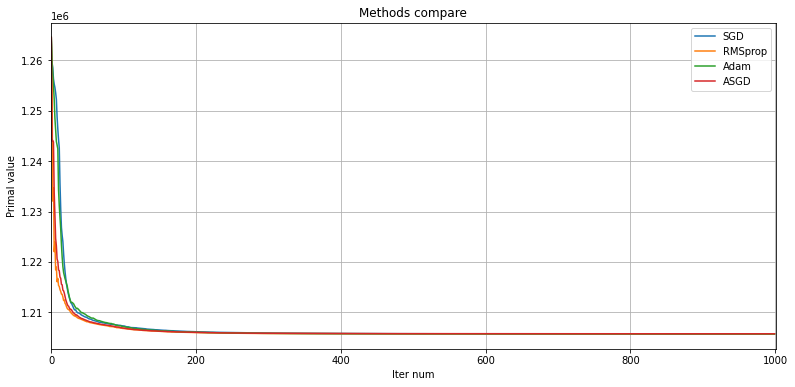

In [22]:
plt.figure(figsize=(13, 6))
plt.plot(range(num_iters), sgd_primal_vals, label='SGD')
plt.plot(range(num_iters), rmsprop_primal_vals, label='RMSprop')
plt.plot(range(num_iters), adam_primal_vals, label='Adam')
plt.plot(range(num_iters), asgd_primal_vals, label='ASGD')

plt.title('Methods compare')
plt.xlim((-1, num_iters+1))
plt.legend()
plt.xlabel('Iter num')
plt.ylabel('Primal value')
plt.grid()
plt.show()

# First 200 iterations

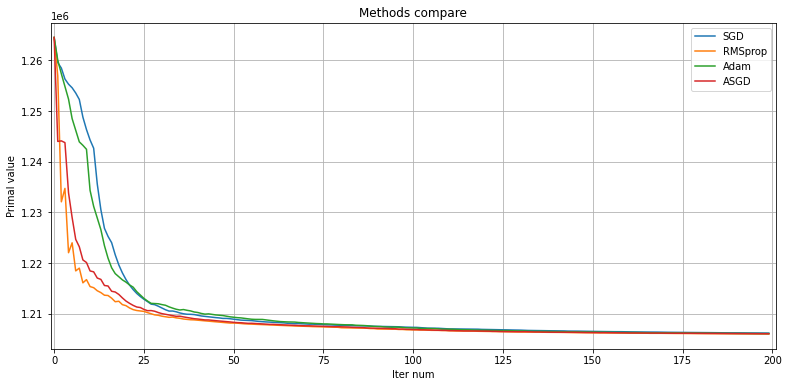

In [27]:
lim=200
plt.figure(figsize=(13, 6))
plt.plot(range(lim), sgd_primal_vals[:lim], label='SGD')
plt.plot(range(lim), rmsprop_primal_vals[:lim], label='RMSprop')
plt.plot(range(lim), adam_primal_vals[:lim], label='Adam')
plt.plot(range(lim), asgd_primal_vals[:lim], label='ASGD')

plt.title('Methods compare')
plt.xlim((-1, lim+1))
plt.legend()
plt.xlabel('Iter num')
plt.ylabel('Primal value')
plt.grid()
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'xlabel'

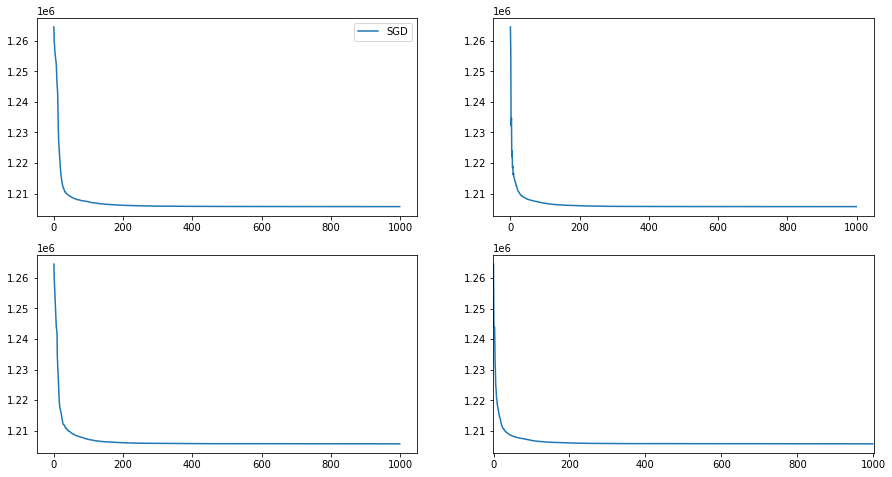

In [34]:

fig, ax = plt.subplots(2, 2, figsize=(15,8))

ax[0, 0].plot(range(num_iters), sgd_primal_vals, label='SGD')
ax[0, 1].plot(range(num_iters), rmsprop_primal_vals, label='RMSprop')
ax[1, 0].plot(range(num_iters), adam_primal_vals, label='Adam')
ax[1, 1].plot(range(num_iters), asgd_primal_vals, label='ASGD')
plt.xlim((-1, num_iters+1))
        
for row in ax:
    for col in row:
        col.legend()
        col.xlabel('Iter num')
        col.ylabel('Primal value')
        col.grid()
 
plt.show()

todo: calculate values for different optimizers

      compare run time with original code (avg step time)

      compare on different transport networks (not only Anaheim)
      
      draw plots
      
      show best known result
      
      findings